# Exercise 3

## Data Preparation

In [18]:
import pandas as pd

#### Original Dataset

In [19]:
df=pd.read_csv("retail_transactions.csv")

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,546729,22775,PURPLE DRAWERKNOB ACRYLIC EDWARDIAN,12,2011-03-16 11:36:00,1.25,18231.0,United Kingdom
1,559898,21868,POTTING SHED TEA MUG,6,2011-07-13 12:18:00,1.25,16225.0,United Kingdom
2,548648,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-04-01 13:20:00,0.85,12949.0,United Kingdom
3,540543,22173,METAL 4 HOOK HANGER FRENCH CHATEAU,4,2011-01-09 15:23:00,2.95,14395.0,United Kingdom
4,561390,20726,LUNCH BAG WOODLAND,10,2011-07-27 09:52:00,1.65,17068.0,United Kingdom


##### Output dataset. Apply data manipulation technique

In [20]:
processed=pd.read_csv("wrangled_transactions.csv")

processed.head()

,CustomerID,2010 revenue,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,2011 revenue
0,12347.0,711.79,23.0,23.0,1.0,711.79,3598.21
1,12348.0,892.80,14.0,14.0,1.0,892.80,904.44
2,12370.0,1868.02,16.0,13.0,2.0,934.01,1677.67
3,12377.0,1001.52,10.0,10.0,1.0,1001.52,626.60
4,12383.0,600.72,8.0,8.0,1.0,600.72,1249.84


## Data pre-processing

In [21]:
df=df[["Quantity","InvoiceDate","UnitPrice","CustomerID"]]

df.head()

,Quantity,InvoiceDate,UnitPrice,CustomerID
0,12,2011-03-16 11:36:00,1.25,18231.0
1,6,2011-07-13 12:18:00,1.25,16225.0
2,24,2011-04-01 13:20:00,0.85,12949.0
3,4,2011-01-09 15:23:00,2.95,14395.0
4,10,2011-07-27 09:52:00,1.65,17068.0


In [22]:
# Calculate the revenue 
df["revenue"]=df.Quantity*df.UnitPrice

df.head()

,Quantity,InvoiceDate,UnitPrice,CustomerID,revenue
0,12,2011-03-16 11:36:00,1.25,18231.0,15.0
1,6,2011-07-13 12:18:00,1.25,16225.0,7.5
2,24,2011-04-01 13:20:00,0.85,12949.0,20.4
3,4,2011-01-09 15:23:00,2.95,14395.0,11.8
4,10,2011-07-27 09:52:00,1.65,17068.0,16.5


In [23]:
# Convert datetime column to datetime object

df["InvoiceDate"]=pd.to_datetime(df.InvoiceDate)

df.head()

,Quantity,InvoiceDate,UnitPrice,CustomerID,revenue
0,12,2011-03-16 11:36:00,1.25,18231.0,15.0
1,6,2011-07-13 12:18:00,1.25,16225.0,7.5
2,24,2011-04-01 13:20:00,0.85,12949.0,20.4
3,4,2011-01-09 15:23:00,2.95,14395.0,11.8
4,10,2011-07-27 09:52:00,1.65,17068.0,16.5


In [24]:
# Adding a column Year
import datetime

df["Year"]= [datetime.datetime.strftime(day, "%Y-%m-%d").split("-")[0] for day in df.InvoiceDate]

df.head()

,Quantity,InvoiceDate,UnitPrice,CustomerID,revenue,Year
0,12,2011-03-16 11:36:00,1.25,18231.0,15.0,2011
1,6,2011-07-13 12:18:00,1.25,16225.0,7.5,2011
2,24,2011-04-01 13:20:00,0.85,12949.0,20.4,2011
3,4,2011-01-09 15:23:00,2.95,14395.0,11.8,2011
4,10,2011-07-27 09:52:00,1.65,17068.0,16.5,2011


In [25]:
# CostomerID should be integer
df["CustomerID"]=[int(ID) for ID in df.CustomerID]

df.head()

,Quantity,InvoiceDate,UnitPrice,CustomerID,revenue,Year
0,12,2011-03-16 11:36:00,1.25,18231,15.0,2011
1,6,2011-07-13 12:18:00,1.25,16225,7.5,2011
2,24,2011-04-01 13:20:00,0.85,12949,20.4,2011
3,4,2011-01-09 15:23:00,2.95,14395,11.8,2011
4,10,2011-07-27 09:52:00,1.65,17068,16.5,2011


In [26]:
# Produce the same data as requested in Output section
ID=set(df.CustomerID)
yearSet=set(df.Year)

newDict={"CustomerID":[],"firstDay":[], "lastDay":[],"buyCount":[],"meanCost":[],\
        "2010":[],"2011":[]}

for eachID in ID:
    sub_ID=df[df.CustomerID==eachID] 
    sortDate=sub_ID.sort_values("InvoiceDate")
    sortDate.reset_index(drop=True, inplace=True)
    newDict["firstDay"].append(sortDate.InvoiceDate.dt.strftime("%Y-%m-%d").values.tolist()[0].split("-")[-1])
    newDict["lastDay"].append(sortDate.InvoiceDate.dt.strftime("%Y-%m-%d").values.tolist()[-1].split("-")[-1])
    newDict["CustomerID"].append(eachID)
    newDict["buyCount"].append(sortDate.Quantity.sum())
    newDict["meanCost"].append(sortDate.revenue.sum()/len(sortDate))
    year10=[]
    year11=[]
    for eachYear in yearSet:
        sub_Year=sub_ID[sub_ID.Year==eachYear]
        doanhThu=sum(sub_Year.revenue)
        if eachYear=="2010":
            year10.append(doanhThu)
        elif eachYear=="2011":
            year11.append(doanhThu)
    newDict["2010"].append(year10[-1])
    newDict["2011"].append(year11[-1])        

In [27]:
df_processed=pd.DataFrame(newDict)

df_Final=df_processed.rename(columns={"firstDay":"days_since_first_purchase","lastDay":"days_since_last_purchase","buyCount":"number_of_purchases",\
                                     "meanCost":"avg_order_cost","2010":"2010_revenue","2011":"2011_revenue"})
df_Final.head()

,CustomerID,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,2010_revenue,2011_revenue
0,16384,21,11,260,17.712121,0.00,584.50
1,16385,08,10,261,9.421864,148.23,407.66
2,16386,31,11,224,3.604545,0.00,317.20
3,16387,21,21,44,23.590000,0.00,94.36
4,16389,01,17,1242,40.649118,0.00,1382.07


In [28]:
df_Final.shape

(4338, 7)

In [29]:
# Filter all rows with 0.00 value in 2010_revenue
df2010=df_Final[df_Final["2010_revenue"]>0]
df2011=df2010[df2010["2011_revenue"]>0]
df2011.reset_index(drop=True, inplace=True)
df2011.head()

,CustomerID,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,2010_revenue,2011_revenue
0,16385,08,10,261,9.421864,148.23,407.66
1,16393,05,07,1576,9.230939,291.55,2754.66
2,16402,05,20,149,4.993333,211.80,87.80
3,16411,05,20,132,4.770000,131.50,83.15
4,16422,05,22,33704,93.995664,2025.32,32659.08


In [30]:
df2011.shape

(766, 7)

## Building a multiple linear regression to predict revenue 2011 based days, purchases, cost, revenue 2010

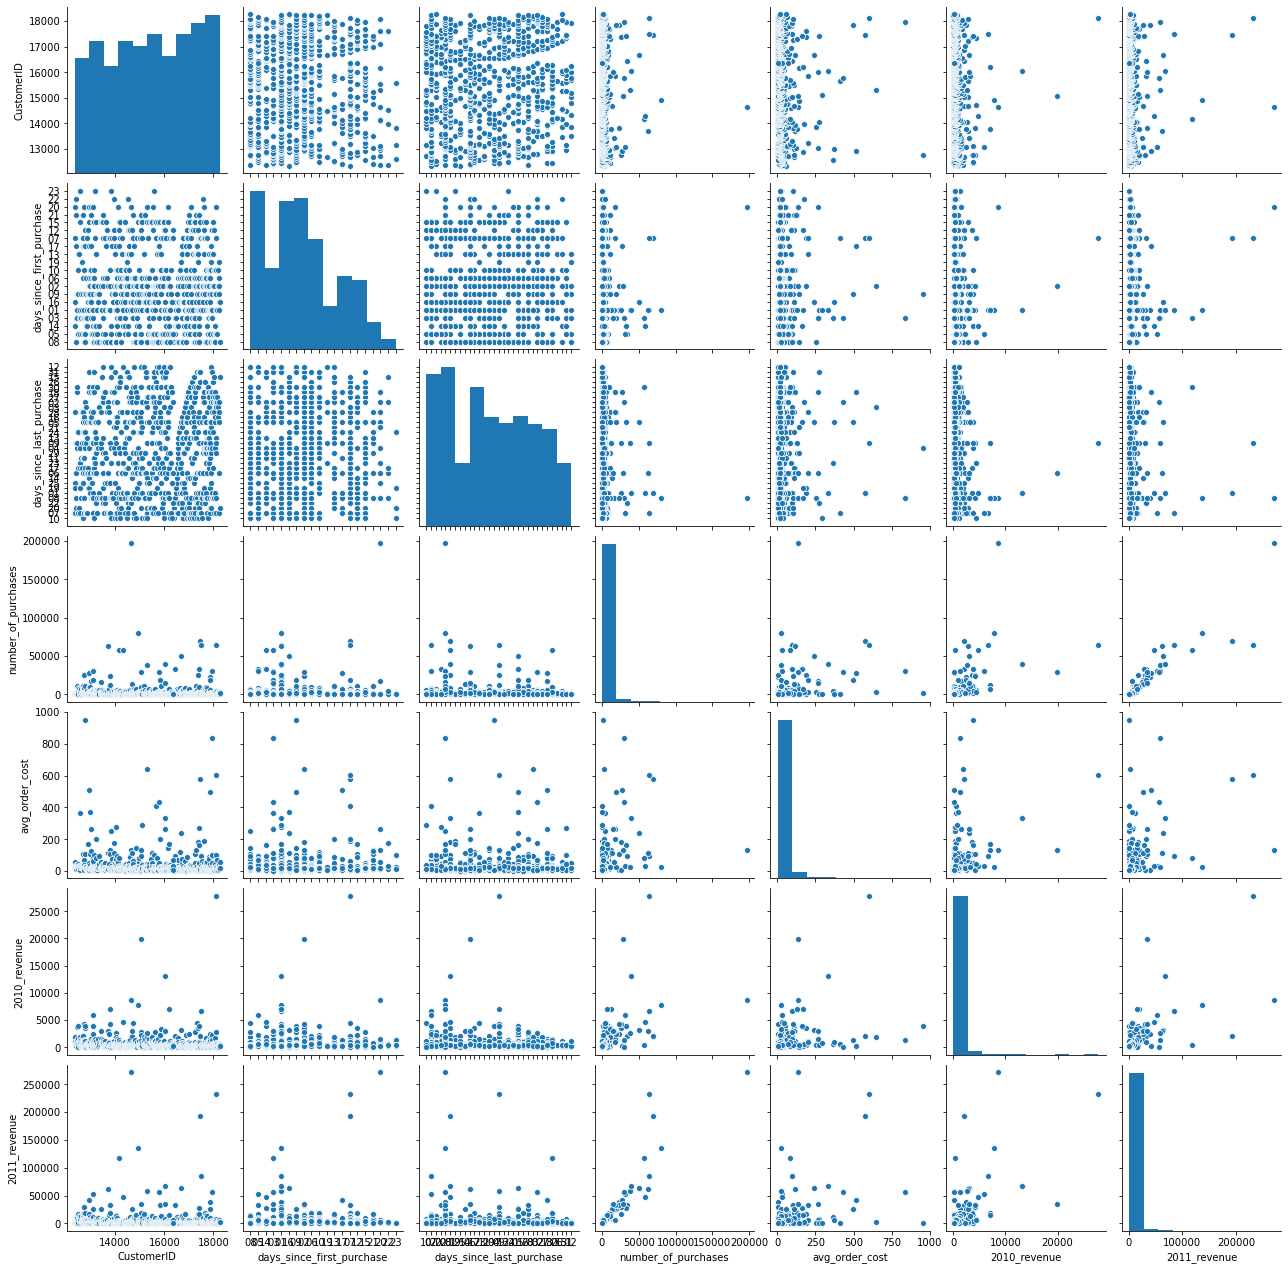

In [17]:
# Feature selection
import seaborn as sns
sns.pairplot(df2011)

In [ ]:
# Features and Target Variables. The correlation plots show that cost, purchases, and revenue 2010 seem correlated with target
X=df2011[["number_of_purchases","avg_order_cost","2010_revenue"]]
y=df2011[["2011_revenue"]]

In [ ]:
# Split training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test=train_test_split(X,y, test_size=0.25, random_state=123)

In [ ]:
# Build the model
from sklearn.linear_model import LinearRegression

model=LinearRegression()

model.fit(X_train, y_train)
# Obtain model parameters

intercept=model.intercept_
slopes=model.coef_

print("Intercept is {} and slopes are {}".format(intercept, slopes))

In [ ]:
# Predict response variable based on X_test

y_pred=model.predict(X_test)

df_test=pd.DataFrame({"Actual":[x[0] for x in y_test.values.tolist()],"Predicted":[x[0] for x in y_pred.tolist()]})

df_test

In [ ]:
# Obtain model accracy
## R^2 for test dataset
R2_test=model.score(X_test,y_test)
R2_test

In [ ]:
# Model accuracy
from sklearn.metrics import mean_squared_error, mean_absolute_error

MSE=mean_squared_error(y_test, y_pred)
import math
RMSE=math.sqrt(MSE)
MAE=mean_absolute_error(y_test,y_pred)

print("RMSE is {} and MAE is {}".format(round(RMSE,3), round(MAE,3)))

In [ ]:
# Visualization

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.distplot(y_pred, hist=False, color="g", label="Predicted")
sns.distplot(y_test,hist=False, color="r", label="Test Data")
plt.subplot(1,2,2)
sns.distplot(y_train, hist=False, color="g",label="Train Data")
sns.distplot(model.predict(X_train), hist=False, color="r", label="Predicted")
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
sns.regplot(x=y_test, y=y_pred,scatter_kws={"color": "black"}, line_kws={"color": "green"},ci=None)
plt.grid()
plt.show()

In [ ]:
# Calculating correlation coefficient 
import numpy as np
y_test1=np.array(y_test).flatten()
y_pred1=np.array(y_pred).flatten()
np.corrcoef(y_test1,y_pred1)[0][1] # Correlation coefficient is 0.90

In [ ]:
# make prediction given data revenue 2010 [1000], number of purchases [2],
# avg_order_cost[500] then what is the revenue 2011?
revenue2011=model.predict([[2,500,1000]])

print("Revenue 2011 is {}".format(revenue2011[0][0]))

# Exercise 4